 Project Title: "Analyzing Factors Influencing Mental Health in the Tech Industry"
Problem Statement:
Mental health is a growing concern in the tech industry. Through this analysis, identify key factors associated with mental health issues among tech workers and provide insights that can help companies build better support systems.

 Goals:
1.Identify demographic and workplace-related factors contributing to mental health issues.
2.Analyze trends and patterns based on geography, gender, age, and company support.
3.Recommend actionable insights for workplace improvement.

Dataset:
Source: Kaggle Mental Health in Tech Survey Dataset
Contains responses from tech employees about mental health, workplace support, openness to discussing mental illness, and demographic information.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# load and preview data
df=pd.read_csv(r"C:\Users\madhu\Downloads\survey.csv")
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [46]:
df.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [47]:
df.shape

(1259, 27)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [49]:
#summary statistics about the data
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [50]:
df[df.duplicated()]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments


In [52]:
# checking missing values
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [53]:
# drop irrelevant columns
df.drop(columns=['state','comments','Timestamp'],inplace=True)

In [54]:
#handling missing values
df['self_employed'].unique()


array([nan, 'Yes', 'No'], dtype=object)

In [55]:
df[df['self_employed'].notna()]['self_employed'].mode()[0]

'No'

In [56]:
# Fill NaNs with the mode
df['self_employed'].fillna(df[df['self_employed'].notna()]['self_employed'].mode()[0], inplace=True)


C:\Users\madhu\AppData\Local\Temp\ipykernel_10728\1308259080.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['self_employed'].fillna(df[df['self_employed'].notna()]['self_employed'].mode()[0], inplace=True)


In [57]:
df[df['work_interfere'].notna()]['work_interfere'].mode()[0]

'Sometimes'

In [58]:
df['work_interfere'].fillna(df[df['work_interfere'].notna()]['work_interfere'].mode()[0], inplace=True)

C:\Users\madhu\AppData\Local\Temp\ipykernel_10728\1712855293.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['work_interfere'].fillna(df[df['work_interfere'].notna()]['work_interfere'].mode()[0], inplace=True)


In [59]:
df.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

UNIVARIATE ANALYSIS

In [60]:
print(df['Age'].sort_values(ascending=False).head(10))


390     99999999999
364             329
1182             72
560              65
520              62
952              61
1236             60
297              60
471              58
475              57
Name: Age, dtype: int64


In [61]:
df = df[(df['Age'] >= 16) & (df['Age'] <= 65)]


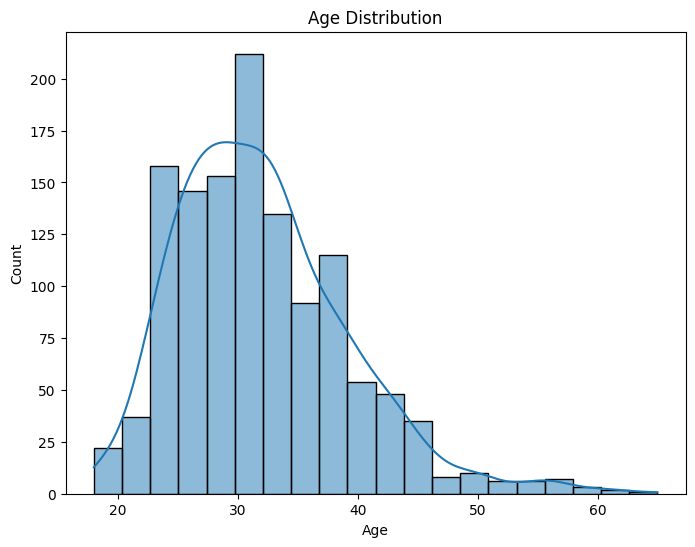

In [62]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


Most respondents are in their late 20s to early 30s, showing that the tech workforce is dominated by young professionals. The age distribution is right-skewed, indicating fewer older participants.

In [63]:
print(df['Gender'].sort_values(ascending=False).head(10))

378                                              woman
93                               something kinda male?
306                                     queer/she/they
818                                              queer
1234    ostensibly male, unsure what that really means
349                                         non-binary
776                                               msle
628                           male leaning androgynous
627                                               male
641                                               male
Name: Gender, dtype: object


In [64]:
df['Gender'] = df['Gender'].str.lower()


C:\Users\madhu\AppData\Local\Temp\ipykernel_10728\2437456436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].str.lower()


In [65]:
def clean_gender(gender):
    if pd.isnull(gender):
        return np.nan
    gender = gender.strip().lower()
    
    if gender in ['male', 'm', 'man', 'cis male', 'cis man']:
        return 'Male'
    elif gender in ['female', 'f', 'woman', 'cis female', 'cis-female/femme']:
        return 'Female'
    else:
        return 'Other'


In [66]:
df['Gender'] = df['Gender'].apply(clean_gender)


C:\Users\madhu\AppData\Local\Temp\ipykernel_10728\1736897268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].apply(clean_gender)


In [67]:
df['Gender'].value_counts()


Gender
Male      975
Female    243
Other      32
Name: count, dtype: int64

Text(0.5, 1.0, 'Gender Distribution')

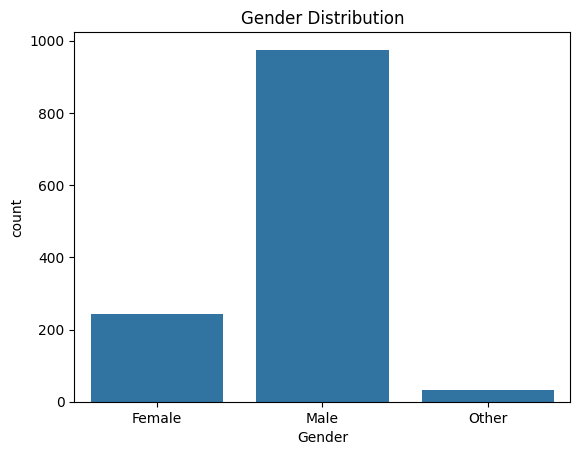

In [68]:
# Gender count
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")

The majority of respondents are male, followed by female, with a small proportion identifying as other. This indicates a gender imbalance in the tech workforce, with males being significantly overrepresented.

Text(0.5, 1.0, 'Sought Treatment for Mental Health')

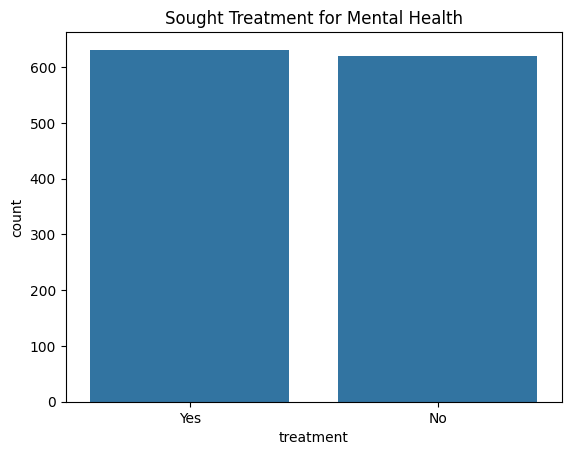

In [69]:
# Mental health condition
sns.countplot(x='treatment', data=df)
plt.title("Sought Treatment for Mental Health")

The number of respondents who sought treatment for mental health is nearly equal to those who did not. This indicates a balanced awareness, but also highlights that a significant portion may still avoid or lack access to treatment.

Text(0.5, 1.0, 'Treatment Received')

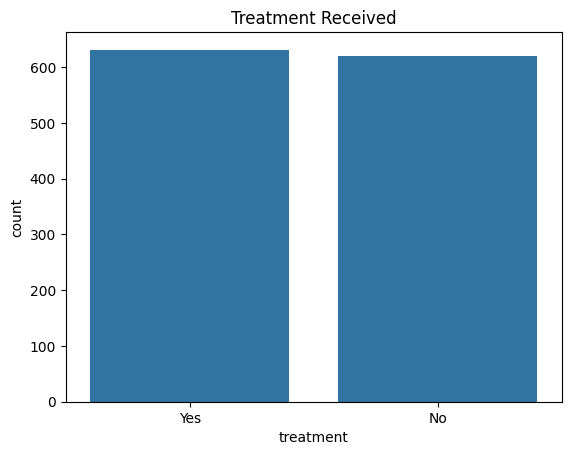

In [70]:
sns.countplot(data=df, x='treatment', order=df['treatment'].value_counts().index)
plt.title('Treatment Received')

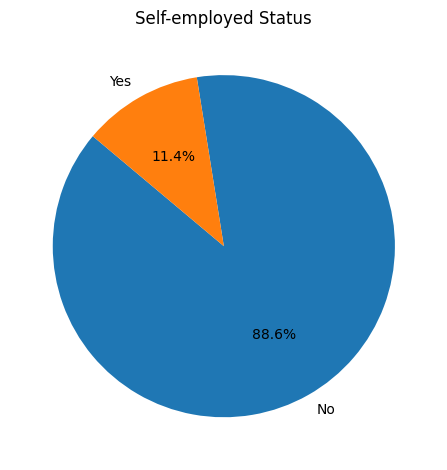

In [71]:
self_emp_counts = df['self_employed'].value_counts()
plt.pie(self_emp_counts, labels=self_emp_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Self-employed Status')

plt.tight_layout()
plt.show()

BIVARIATE ANALYSIS

Text(0.5, 1.0, 'Gender vs. Mental Health Treatment')

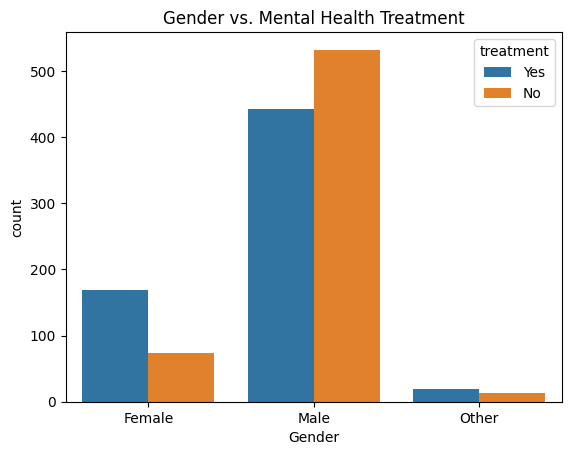

In [27]:
# Gender vs. Treatment
sns.countplot(x='Gender', hue='treatment', data=df)
plt.title("Gender vs. Mental Health Treatment")

The above graph shows us the comparison between different gender taking mental health treatment. It shows that male are more aware about mental health than female but the proportion of male taking treatment are less than those who are not. In case of female, there are more female taking treatment than those females who are not.

Text(0.5, 1.0, 'Company Benefits vs. Mental Health Treatment')

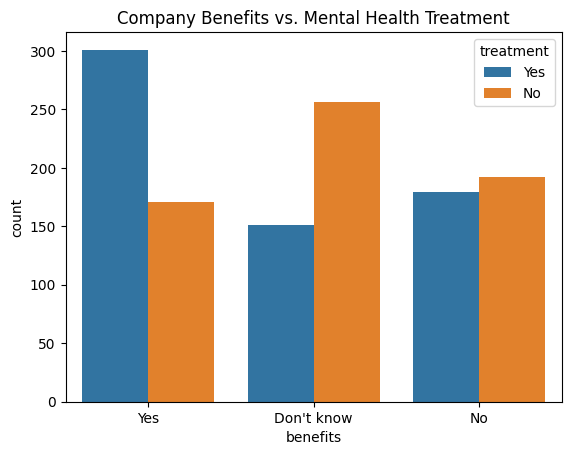

In [28]:
# Employer support vs. Treatment
sns.countplot(x='benefits', hue='treatment', data=df)
plt.title("Company Benefits vs. Mental Health Treatment")

1) Employees Aware of Mental Health Benefits (Yes):

A larger number sought treatment than those who didn’t.

Indicates that when mental health benefits are available and known, employees are more likely to seek treatment.

2) Employees Unaware of Benefits (Don't know):

Most respondents did not seek treatment.

Suggests that lack of awareness about company benefits may be a barrier to seeking help, even if benefits exist.

3) Employees without Benefits (No):

Treatment and no-treatment counts are more balanced but slightly in favor of not seeking treatment.

Implies that the absence of benefits may discourage treatment or make access more difficult


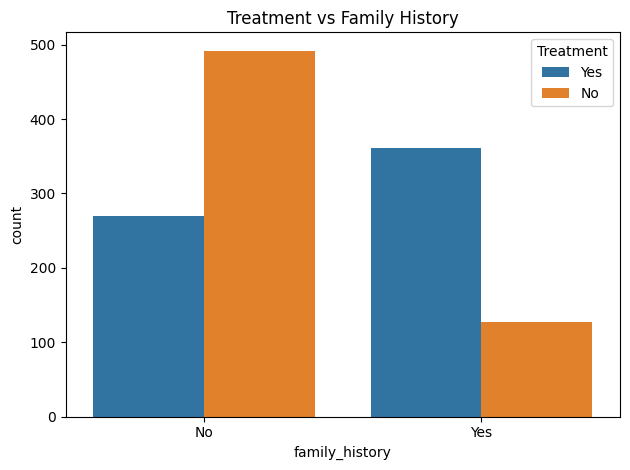

In [73]:
# Treatment vs Family History
sns.countplot(data=df, x='family_history', hue='treatment')
plt.title('Treatment vs Family History')
plt.legend(title='Treatment')
plt.tight_layout()
plt.show()

Individuals who have a family history of mental illness are much more likely to seek treatment themselves.

In [29]:
# Chi-Square test between benefits and treatment
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['benefits'], df['treatment'])
chi2, p, dof, expected = chi2_contingency(contingency)
print("Chi-Square p-value:", p)

Chi-Square p-value: 1.8521479073804376e-14


The p-value is extremely small, much less than level of significance level (e.g., 0.05 or 0.01).
This indicates a that there is association between between benefits provided by employer for mental health and the treatment

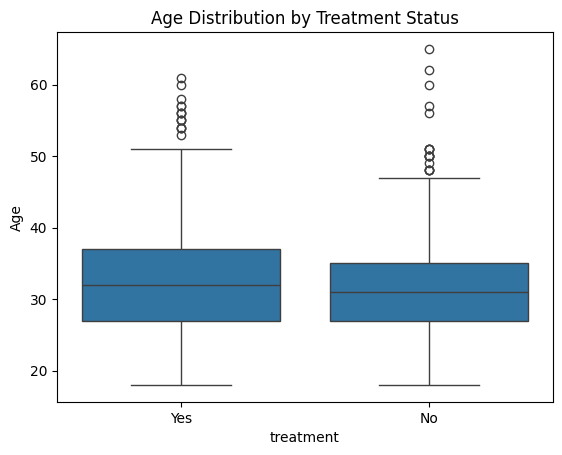

In [30]:
sns.boxplot(x='treatment', y='Age', data=df)
plt.title("Age Distribution by Treatment Status")
plt.show()


Age does not significantly affect the likelihood of seeking mental health treatment, based on this distribution.

However, there may be a slight trend that older individuals (outliers) are more inclined to seek treatment.

For predictive modeling, age alone is unlikely to be a strong feature unless combined with other variables (e.g., work interference, family history, benefits).



feature engineering

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1250 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1250 non-null   int64 
 1   Gender                     1250 non-null   object
 2   Country                    1250 non-null   object
 3   self_employed              1250 non-null   object
 4   family_history             1250 non-null   object
 5   treatment                  1250 non-null   object
 6   work_interfere             1250 non-null   object
 7   no_employees               1250 non-null   object
 8   remote_work                1250 non-null   object
 9   tech_company               1250 non-null   object
 10  benefits                   1250 non-null   object
 11  care_options               1250 non-null   object
 12  wellness_program           1250 non-null   object
 13  seek_help                  1250 non-null   object
 14  anonymity    

In [74]:
df.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [75]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_col = df.select_dtypes(include=['object','category']).columns

for col in cat_col:
    df[col] = le.fit_transform(df[col])

C:\Users\madhu\AppData\Local\Temp\ipykernel_10728\2728592557.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\madhu\AppData\Local\Temp\ipykernel_10728\2728592557.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\madhu\AppData\Local\Temp\ipykernel_10728\2728592557.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [76]:
df.head(10)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,44,0,0,1,1,4,0,1,...,2,2,1,1,1,2,1,0,2,0
1,44,1,44,0,0,0,2,5,0,0,...,0,0,0,1,0,0,1,1,0,0
2,32,1,6,0,0,0,2,4,0,1,...,0,1,1,1,2,2,2,2,1,0
3,31,1,43,0,1,1,1,2,0,1,...,1,1,2,2,1,0,0,0,1,1
4,31,1,44,0,0,0,0,1,1,1,...,0,0,1,1,1,2,2,2,0,0
5,33,1,44,0,1,0,3,4,0,1,...,0,0,1,1,2,2,1,0,0,0
6,35,0,44,0,1,1,3,0,1,1,...,1,1,0,0,1,0,1,1,0,0
7,39,1,6,0,0,0,0,0,1,1,...,2,0,1,1,0,0,1,1,1,0
8,42,0,44,0,1,1,3,1,0,1,...,1,3,0,1,2,2,1,0,1,0
9,23,1,6,0,0,0,0,2,0,1,...,0,0,1,1,2,2,0,0,2,0


In [77]:
df.corr()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
Age,1.000000,0.077299,0.153590,0.075854,0.003675,0.070164,-0.033397,0.029288,0.142003,-0.049431,...,0.027887,-0.011632,0.032221,-0.045506,-0.007608,0.004687,0.062833,-0.024435,-0.007535,0.061374
Gender,0.077299,1.000000,-0.066953,0.028630,-0.118511,-0.159005,-0.044540,0.026262,0.001826,0.061954,...,-0.027412,0.036916,0.024875,0.022176,0.047025,0.072444,-0.043087,-0.012443,-0.016450,-0.044863
Country,0.153590,-0.066953,1.000000,-0.120123,0.065771,0.079926,0.021331,0.098044,-0.016343,-0.039021,...,0.005370,-0.100912,-0.043091,-0.013723,-0.027727,0.001143,0.056024,-0.013452,-0.009362,-0.068036
self_employed,0.075854,0.028630,-0.120123,1.000000,0.002911,0.016733,-0.023059,-0.335913,0.314619,0.075858,...,0.097806,0.168266,0.020526,0.012023,0.073675,0.036628,-0.024563,-0.026736,0.131839,0.068590
family_history,0.003675,-0.118511,0.065771,0.002911,1.000000,0.376067,0.110020,-0.050156,0.012760,-0.047636,...,0.060630,0.017920,0.025673,-0.001538,-0.002505,0.001481,0.037824,0.035344,0.040050,0.115500
treatment,0.070164,-0.159005,0.079926,0.016733,0.376067,1.000000,0.139342,-0.048147,0.025321,-0.030903,...,0.143013,0.060104,0.027956,-0.013122,0.070239,-0.034300,0.093321,0.049111,0.063594,0.151016
work_interfere,-0.033397,-0.044540,0.021331,-0.023059,0.110020,0.139342,1.000000,0.001682,0.014258,0.008098,...,0.047013,0.011249,-0.006701,-0.045358,-0.000308,-0.035805,0.054688,0.011014,0.008838,0.026240
no_employees,0.029288,0.026262,0.098044,-0.335913,-0.050156,-0.048147,0.001682,1.000000,-0.212708,-0.109110,...,-0.002178,-0.089439,-0.004233,-0.066274,-0.088215,-0.052296,0.023125,0.029218,-0.023695,-0.012357
remote_work,0.142003,0.001826,-0.016343,0.314619,0.012760,0.025321,0.014258,-0.212708,1.000000,0.135023,...,-0.006117,0.096844,0.055654,-0.013226,0.078298,0.021160,-0.036537,-0.019186,0.034200,-0.046322
tech_company,-0.049431,0.061954,-0.039021,0.075858,-0.047636,-0.030903,0.008098,-0.109110,0.135023,1.000000,...,-0.056347,0.044355,0.000923,0.062240,0.072392,0.051301,-0.043491,-0.034253,0.022187,-0.062869


<Axes: >

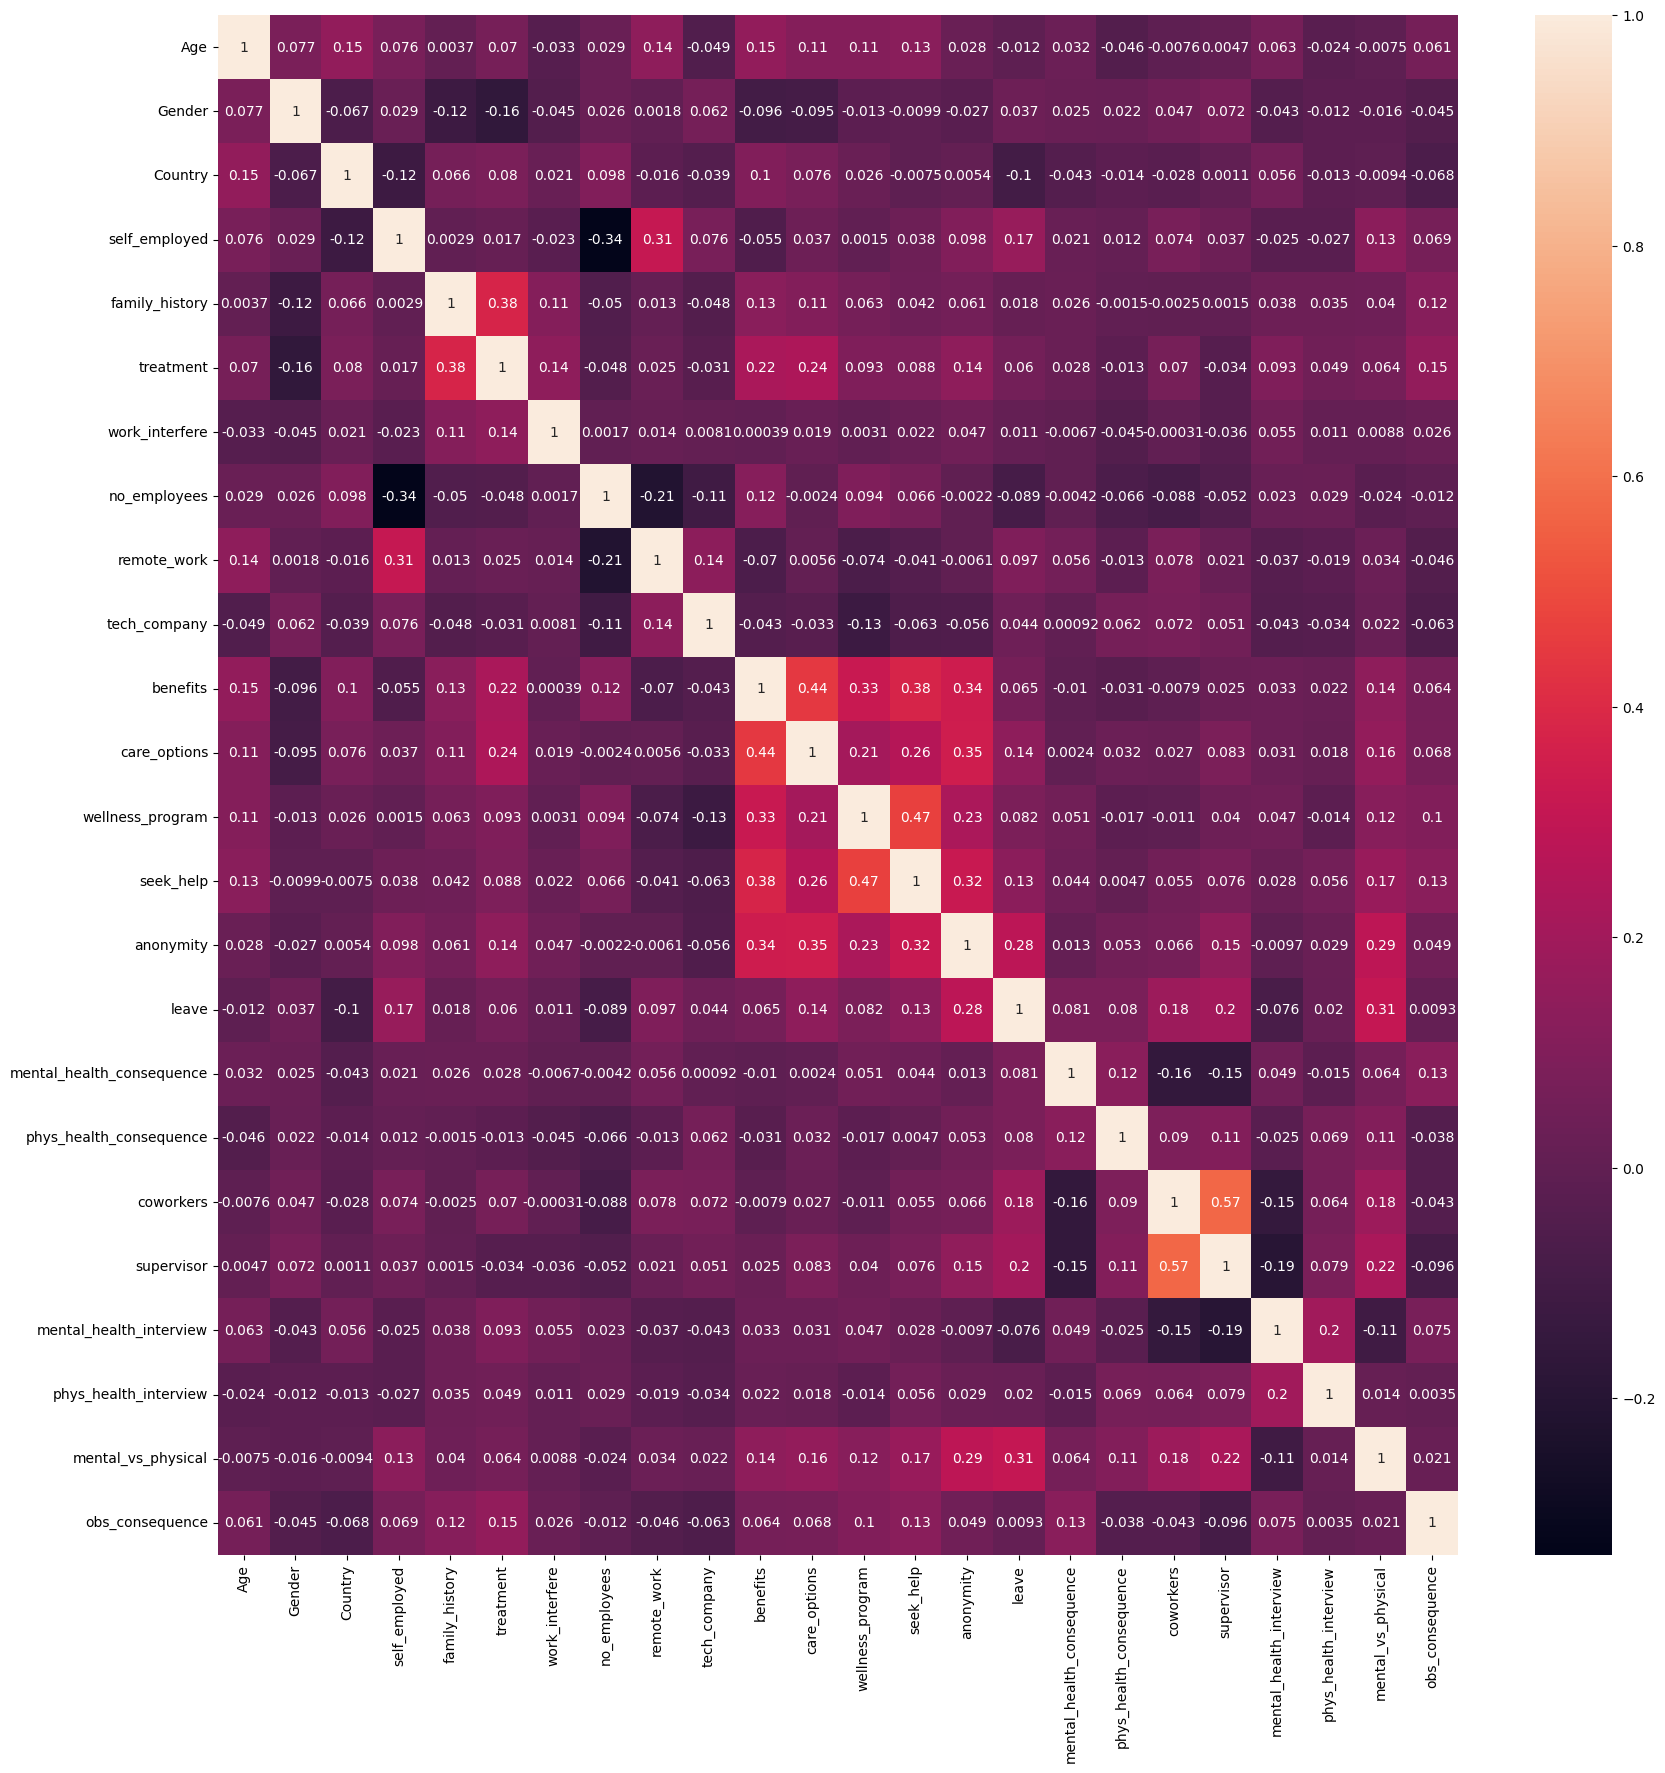

In [78]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

Mental health support systems (benefits, care options, anonymity, etc.) are interconnected and tend to positively influence help-seeking behavior.

Family history and perceived work interference are moderately linked to seeking treatment.

Cultural and organizational context (like country or company size) may influence mental health openness indirectly.

No strong linear correlation dominates the data — this suggests that machine learning models (like Random Forests you used) are appropriate for capturing non-linear and complex interactions.